<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things


import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Pandas version 0.24.2
Matplotlib version 3.0.3


In [0]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [5]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [0]:
df.to_csv('births1880.csv',index=False,header=False)

In [8]:
df.dtypes

Names     object
Births     int64
dtype: object

In [9]:
df.Births.dtype

dtype('int64')

In [10]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [11]:
# Method 2:
df['Births'].max()

973

The most popular name


,Names,Births
4,Mel,973


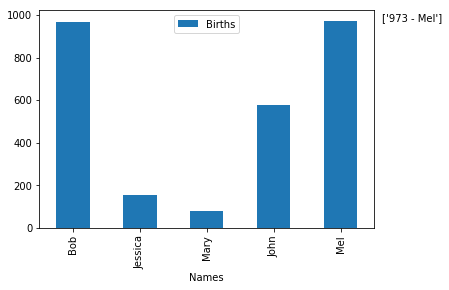

In [18]:
# Create graph
df.plot(x = 'Names', y = 'Births', kind = 'bar')

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

## Challenge

Using Python, write code that quantifies the following data:

Grow Mart, Plant Depot, and Trees’R’Us are gardening stores in a city. Grow Mart and Plant Depot were both founded in 1973, and Trees’R’Us was founded in 1985. Grow Mart has annual revenue of ```$```265k and expenses of ```$```183k, Plant Depot has ```$```302k revenue and ```$```240k expenses, and Trees’R’Us has ```$```123k revenue and ```$```130k expenses.

In addition to describing the above, add a feature is_profitable. What sort of feature should this be, and how should it be determined? 

In [0]:
 # Set up a dataframe to store the gardening store details.

data = {'store_name': ['Grow Mart', 'Plant Depot', 'Trees’R’Us'],
        'year_established': [1973, 1973, 1985],
        'annual_revenue': [265000, 302000, 123000],
        'annual_expenses': [183000, 240000, 130000]}

stores = pd.DataFrame(data)
stores

,store_name,year_established,annual_revenue,annual_expenses
0,Grow Mart,1973,265000,183000
1,Plant Depot,1973,302000,240000
2,Trees’R’Us,1985,123000,130000


In [0]:
# Add a binary (boolean) feature is_profitable, indicating whether revenue 
# exceeds expenses for each store.

stores['is_profitable'] = stores['annual_revenue'] > stores['annual_expenses']
stores

,store_name,year_established,annual_revenue,annual_expenses,is_profitable
0,Grow Mart,1973,265000,183000,True
1,Plant Depot,1973,302000,240000,True
2,Trees’R’Us,1985,123000,130000,False


## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [19]:
# Reference: https://github.com/iamaziz/PyDataset

! pip install pydataset

    100% |████████████████████████████████| 15.9MB 2.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [20]:
from pydataset import data

initiated datasets repo at: /root/.pydataset/


In [21]:
# Import and display the data for Anscombe's quartet.

anscombe = data('anscombe')
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


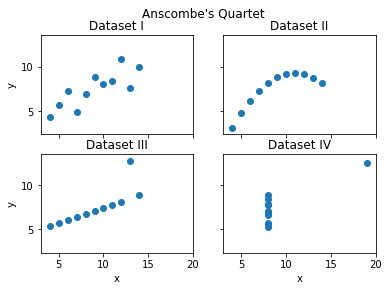

In [22]:
# Display scatterplots for the four datasets of the quartet.

f, axarr = plt.subplots(2, 2, sharex='all', sharey='all')
f.suptitle('Anscombe\'s Quartet')

# Assign data and titles to subplots.
axarr[0, 0].scatter(anscombe['x1'], anscombe['y1'])
axarr[0, 0].set_title('Dataset I')
axarr[0, 1].scatter(anscombe['x2'], anscombe['y2'])
axarr[0, 1].set_title('Dataset II')
axarr[1, 0].scatter(anscombe['x3'], anscombe['y3'])
axarr[1, 0].set_title('Dataset III')
axarr[1, 1].scatter(anscombe['x4'], anscombe['y4'])
axarr[1, 1].set_title('Dataset IV')

# Set axis labels.
for ax in axarr.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide unneeded labels.
for ax in axarr.flat:
    ax.label_outer()

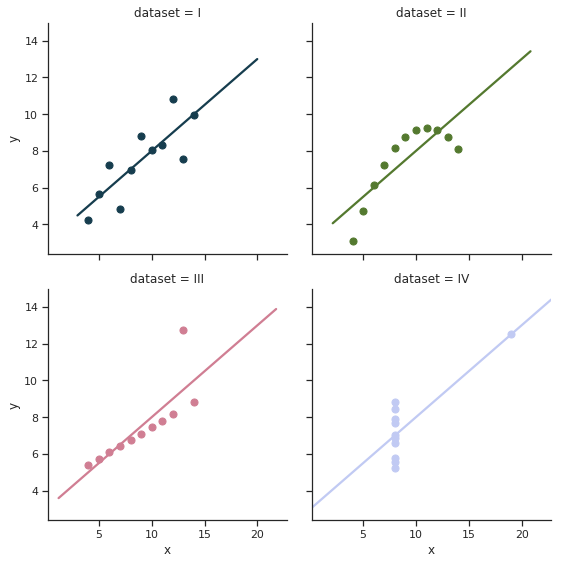

In [30]:
# Seaborn version (with linear regression)
# Source: https://seaborn.pydata.org/examples/anscombes_quartet.html

import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="cubehelix", height=4,
           scatter_kws={"s": 50, "alpha": 1});

In [33]:
# Peek at the dataframe behind the seaborn plot.

df.sample(6)

,dataset,x,y
36,IV,8.0,8.84
26,III,11.0,7.81
19,II,12.0,9.13
0,I,10.0,8.04
38,IV,8.0,7.04
4,I,11.0,8.33


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

> Pandas and matplotlib are core data science libraries for Python, and seaborn is another popular tool. Anscombe's quartet is a classic group of datasets traditionally used to demonstrate the limitations of common statistical properties and linear regression for describing and understanding data - as can be see in the plots above, the four datasets are quite different, but applying linear regression yields the same line for each.

> Using these three libraries to graph this classic group of datasets seemed like a natural way to begin a data science course.


2.  What was the most challenging part of what you did?

> Setting up and formatting the quartet subplots in matplotlib was the most time-consuming step.

3.  What was the most interesting thing you learned?

> Aziz Alto's pydataset library was a nifty find.

4.  What area would you like to explore with more time?

> I'd like to re-write the matplotlib code to use less repetition, and I'd like to customize the seaborn example, as it's currently a simple cut and paste, which isn't terribly educational.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.